In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
from sklearn .datasets import fetch_california_housing 
housing = fetch_california_housing()

In [4]:
type(housing) # this belongs to something a sklearn.utils._bunch.Bunch like datasets somewhat similar to dictionary type data 

sklearn.utils._bunch.Bunch

In [5]:
print(housing.DESCR)
#size is not that much small 

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


# Data Preparation

In [9]:
datasets = pd.DataFrame(housing.data , columns = housing.feature_names)
type(datasets)

pandas.core.frame.DataFrame

In [10]:
datasets.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
datasets["Price"] = housing .target
datasets.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
datasets.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [14]:
datasets.describe()
# as count is same u can see no null values 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Exploratory data analysis (EDA)

In [16]:
# While checking the correlation between two feature when two feature are highly correlated with each other then we eliminate one of them beacuase 
# elemeneting will not affect because its same work its correlated function is doing 
# this is called as feature selection technique because as we know two many features are not that much useful if they are conveying same type of info 
# as of now we cannot see any features having +ve or -ve correlation with each other usualy +-0.85 is consider  

In [17]:
datasets.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


* avebedroom and averoom : 0.847621
* longitude and latitude : -0.924664

In [19]:
#sns.pairplot(datasets)

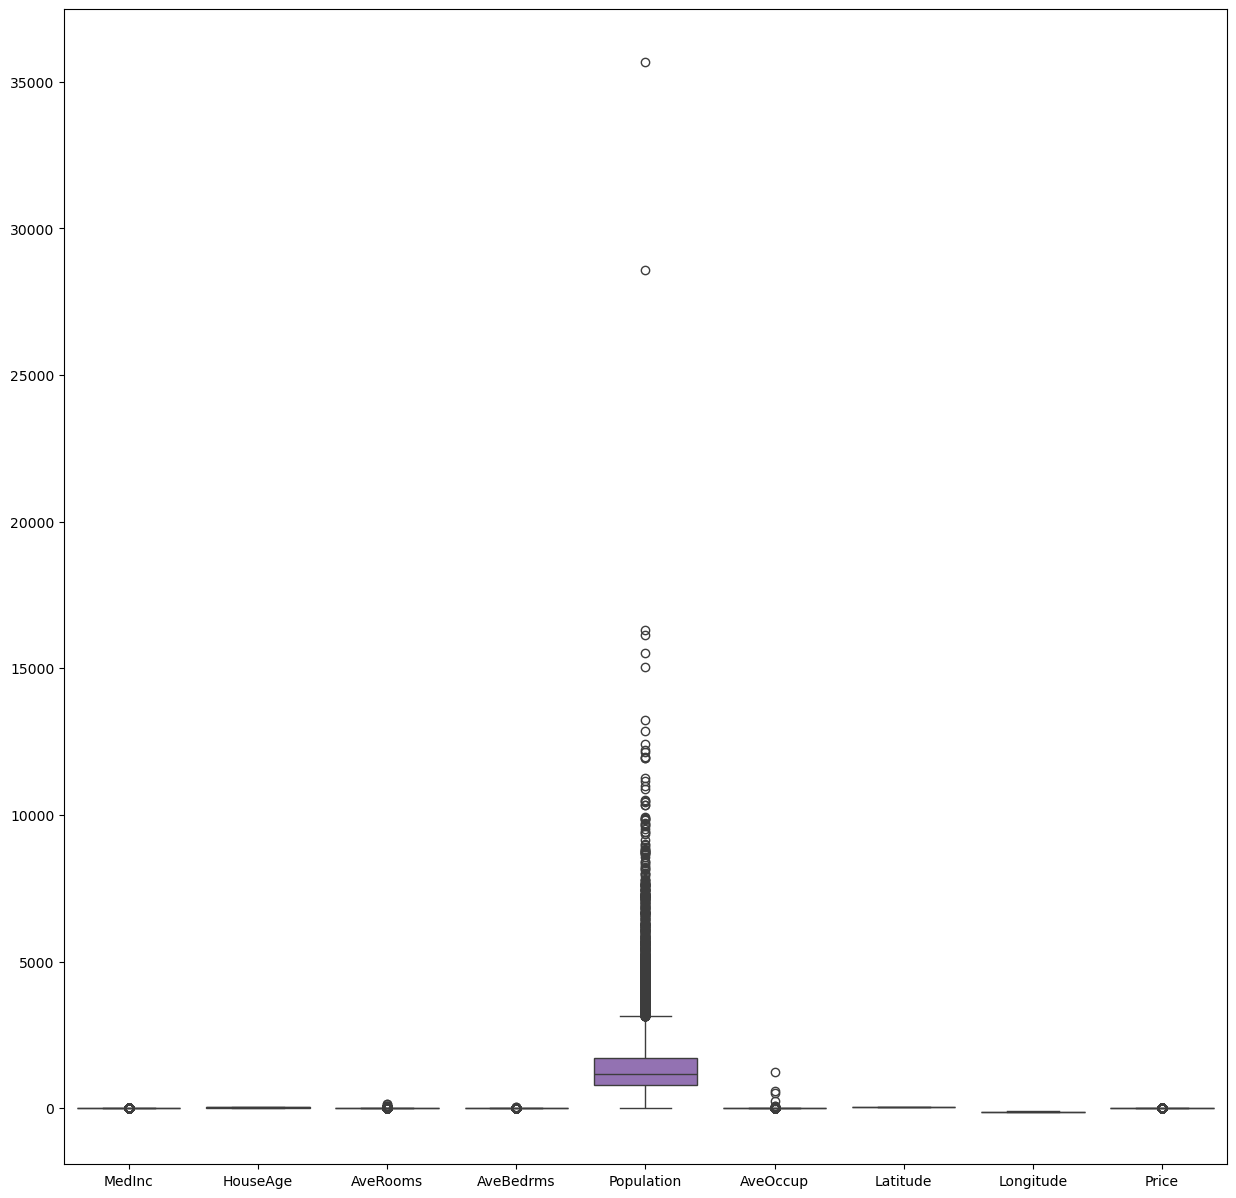

In [20]:
# Detect outliers 
fig, ax= plt.subplots(figsize = (15,15))
sns.boxplot(data = datasets , ax=ax )
plt.savefig("boxplot.jpg")
# as we know population feature having like too much high values as compare to ather features so this one will dominate aother feature 
# and in same way our model will give more priority to this feature than other ones which will create biasness 

In [21]:
# to avoid this bias we need to do a standardization
# for that we have to do normalization of all feature the value had 
# there are two ways to proceed for it 1) standard scalar 2) minmax scalar 
# so we are going to use 1st one here  

In [22]:
# split the data in independent and dependent features 
x = datasets.iloc[: , :-1]
y = datasets.iloc[: , -1]

In [23]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [24]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [25]:
# split the data into train and test sets 
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size=0.3 , random_state = 42)

In [26]:
y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: Price, Length: 14448, dtype: float64

In [27]:
# normalization of the given data points 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)

In [28]:
x_train_norm

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

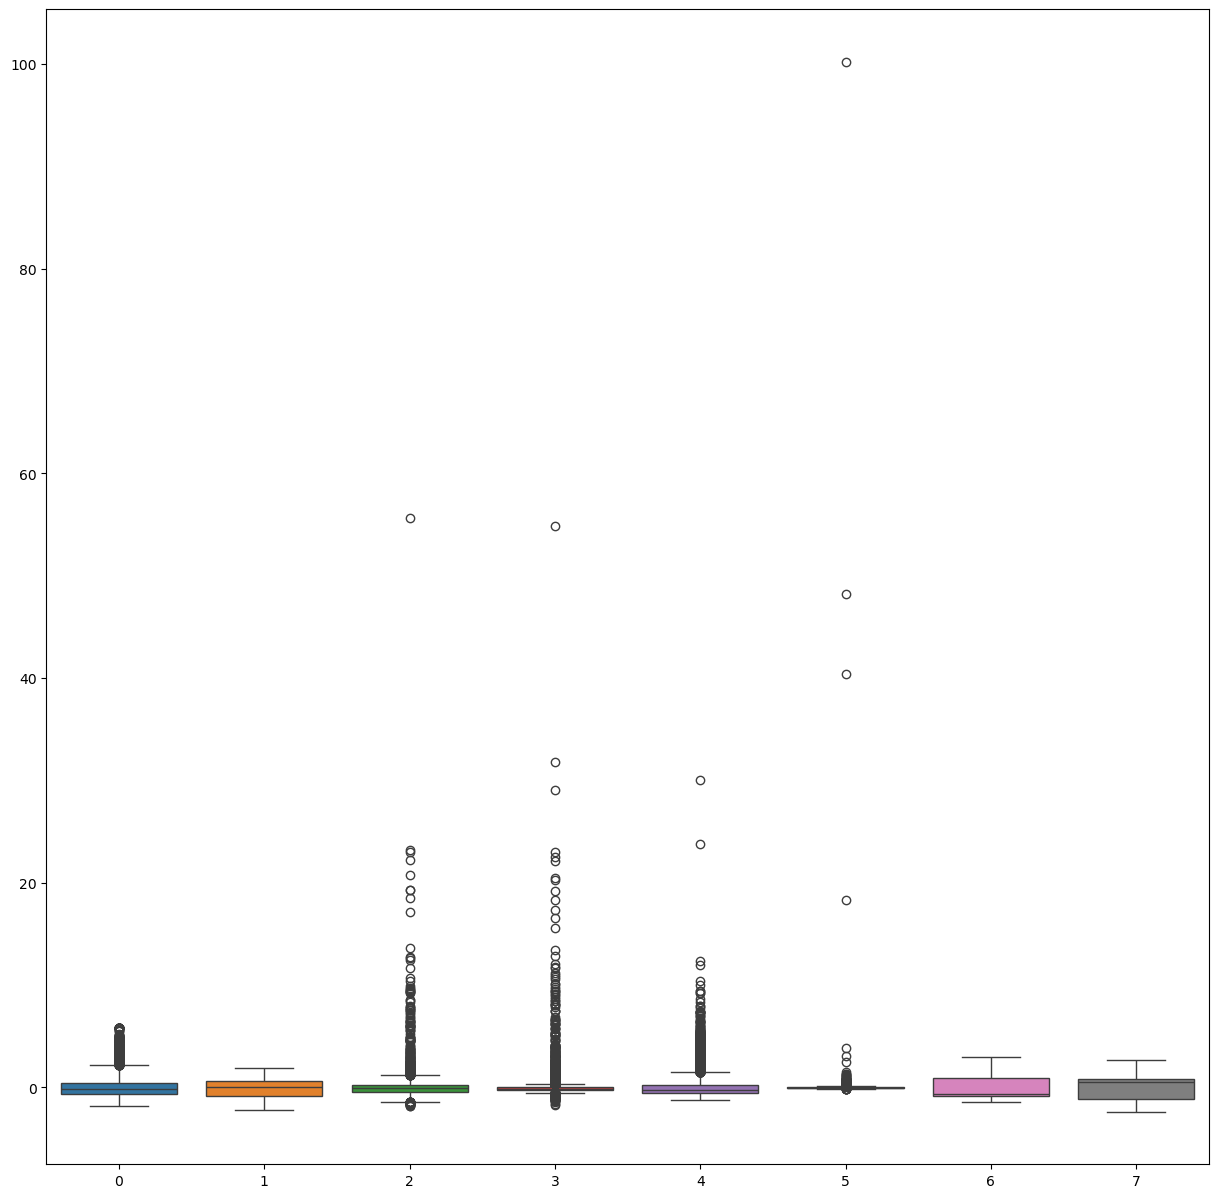

In [29]:

fig, ax= plt.subplots(figsize = (15,15))
sns.boxplot(data = x_train_norm , ax=ax )
plt.savefig("boxplot.jpg")
# now u can see the difference here data had get normalized and we are able to see outliers of other variables also
# we had decrease monopoly of population feature 

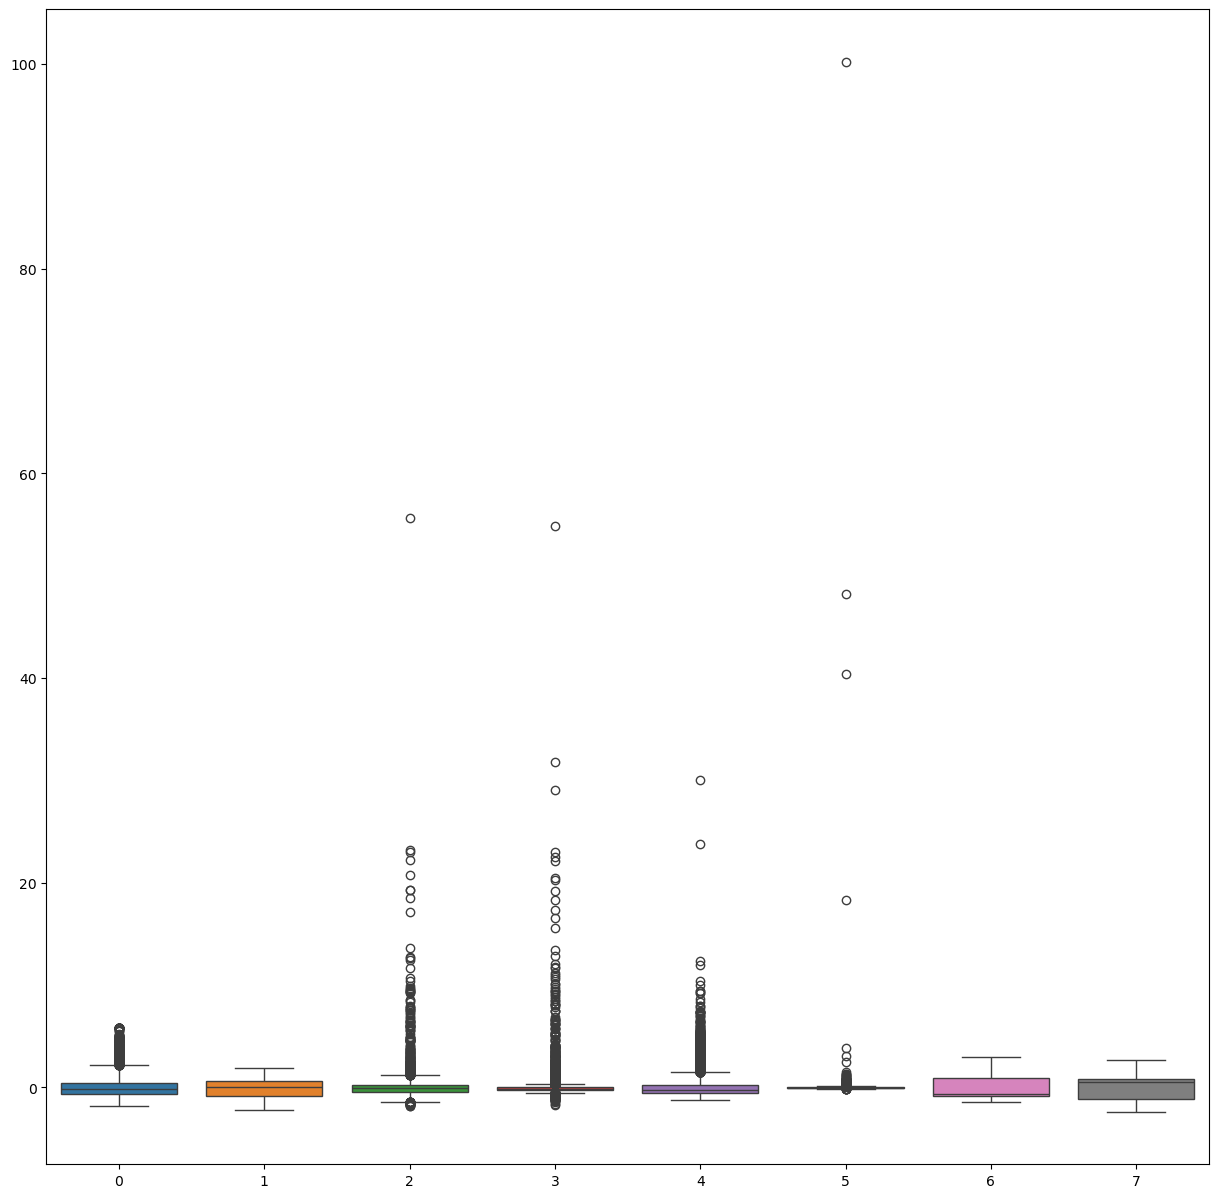

In [30]:
x_test_norm = scaler.transform(x_train)
fig, ax= plt.subplots(figsize = (15,15))
sns.boxplot(data = x_test_norm , ax=ax )
plt.savefig("boxplot x_text_norm.jpg")

In [31]:
# for train data we have to use = scaler.fit_transform(x_train)
# for test data we have to use = scaler.transform(x_train)
# why ? fit-> compute the value of mean and sigma transform-> we have to transform all values using zvalue-formula
# and we dont have to change the properties of test sets 

# Model Training 

In [33]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train_norm , y_train)
# as we had not removed any of the feature  but u can consider averooms and avebedroom one 

LinearRegression()

In [34]:
print(regression.coef_)
# as we are using multiple linear regression
# this is nothing but the value of m1 , m2 .... m8 
print(regression.intercept_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
2.0692396089424165


# Model Prediction

In [36]:
reg_pred = regression.predict(x_test_norm)

reg_pred

array([2.13761366, 1.76385736, 2.75114302, ..., 2.03900584, 2.84130506,
       2.27916759])

In [62]:
#now we will see an resedual 
# residuals = y_test - reg_pred

In [ ]:
## distribution plot of the residuals 
# more the resedual in normal distribution better will be model 
#U CAN PLOT IT USING sns.distplot(reseduals , kind = "kde")

In [64]:
# from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score 
# print(mean_squared_error(y_test , reg_pred))
# print(mean_absolute_error(y_test , reg_pred))
# print(r2_square(y_test , reg_pred))

In [ ]:
# Save the model (Pickle File) imp

In [44]:
import pickle
# this pickle file also helps us on deployment part so on cloud based platform
pickle.dump(regression , open('model.pkl', 'wb'))
# wb is because we are writting that file 
#we we have to save this file dump is a function
# whenever deployment part comes we have to use this pickle fie 

In [48]:
# now we will see that how we can use this file 
model = pickle.load(open('model.pkl',"rb"))
# when we have use this file load is the function 

In [52]:
housing.data[0] # this is the house for which we have predict 

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [58]:
model.predict(scaler.transform(housing.data[0].reshape(1,-1)))
#this is a reasonable value predicted by our model 
# again try to use x_test_norm on this model and compare value with previous one x_test_norm output we had get u will get same value 
# which shows saved model is also working properly 

C:\Users\haris\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])